In [2]:
import PIL
from PIL import Image
import numpy
import sklearn
from sklearn.cluster import KMeans

print('Pillow Version:', PIL.__version__)
png = Image.open('./ex9Data/bird_small.tiff')
png_data = numpy.asarray(png)

#print(png_data)

#flattening the array
png_data_flat = []

for line in png_data :
    for pixel in line : 
        png_data_flat.append(pixel)

#print(png_data_flat)

kmeans = KMeans(n_clusters=60).fit(png_data_flat)
print(kmeans.labels_)
print(kmeans.cluster_centers_)


Pillow Version: 8.4.0
[32 32 32 ... 38 16 16]
[[ 32.25590956  34.51181912  32.19116136]
 [205.53719008 174.71625344 115.41597796]
 [113.6827957   96.04301075  57.44086022]
 [251.21028037 220.29439252 200.03271028]
 [157.4        176.12941176 180.75294118]
 [ 92.34418605  69.11627907  60.3627907 ]
 [171.5        149.28688525 104.46311475]
 [186.69148936 147.46099291  78.5212766 ]
 [198.13736264 169.73626374 170.85714286]
 [ 24.24500768  26.19738863  23.52227343]
 [166.05154639 209.88659794 230.21649485]
 [250.74418605 183.2248062  108.11627907]
 [252.33144476 247.00283286 200.62889518]
 [134.78923767 128.87892377 122.64125561]
 [243.09655172 163.46206897  70.84827586]
 [184.63636364 132.22348485  55.24242424]
 [ 42.5295858   43.41863905  41.80769231]
 [162.57327586 136.55603448 135.18103448]
 [125.87142857  85.22142857  32.32857143]
 [243.25083612 228.10702341 153.909699  ]
 [212.96527778 188.69444444 190.37847222]
 [ 69.4         78.21538462 121.49230769]
 [119.8875502   94.83534137  8

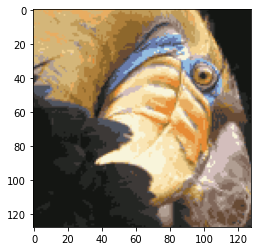

In [3]:
#Q3
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=20).fit(png_data_flat)

png_data_flat_approx = []

for label in kmeans.labels_ :
    png_data_flat_approx.append(kmeans.cluster_centers_[label])

#print(png_data_flat_approx)

#deflattening the tuple
png_data_approx = []
pixel_index = 0
for linenb in range(png_data.shape[0]):
    line = []
    for pixelnb in range(png_data.shape[1]):
        line.append(png_data_flat_approx[pixel_index]/255)
        pixel_index += 1
    png_data_approx.append(line)

#print(png_data_approx)

plt.imshow(numpy.asarray(png_data_approx))  # Needs to be in row,col order


In [4]:
#Q4

def SE(RGB1,RGB2):
    err_RGB = [0,0,0]
    for k in range(3):
        err_RGB[k] = abs((RGB1[k] - RGB2[k])) ** 2
    return err_RGB

def MSE_flat(RGB_SEQ1, RGB_SEQ2):
    MSE = [0,0,0]
    for k in range(len(RGB_SEQ1)):
        pixel_square_error = SE(RGB_SEQ1[k], RGB_SEQ2[k])
        for k in range(3):
            MSE[k] += pixel_square_error[k]/len(RGB_SEQ1)
    
    return MSE

#print(png_data_flat_approx)
#print(png_data_flat)
print(MSE_flat(png_data_flat_approx, png_data_flat))


[115.76882737369155, 117.63751105266785, 148.73440836524284]


In [5]:
import math

K = 15

kmeans = KMeans(n_clusters=K).fit(png_data_flat)


def RLE_encoder_kmeans(png_data):
    #flattening the data :
    RLE_data = []
    currentpixel = png_data[0]
    RLE_data.append((1, currentpixel))

    for pixel in png_data:
        if pixel == currentpixel:
            #we increment the last stored tuple
            tmp_tup = RLE_data[-1]
            RLE_data[-1] = (tmp_tup[0]+1, tmp_tup[1])
        else:
            #we add the new sequence beginning to the RLE array
            RLE_data.append((1, pixel))
            currentpixel = pixel
    return RLE_data


#print(RLE_encoder_kmeans(kmeans.labels_))

def getProba(v):
    probDict = {}
    l = len(v)
    for symbol in v:
        if symbol in probDict:
            probDict[symbol] += 1
        else:
            probDict[symbol] = 1

    for key in probDict:
        probDict[key] = probDict[key]/l

    return probDict


#print(getProba(kmeans.labels_))

def getEntropy(v):
    probDict = getProba(v)
    H = 0
    for symbol in probDict:
        H += -probDict[symbol]*math.log(probDict[symbol], 2)

    return H


print("Bit par pixel skmeans RLE (k = ",K,") = ",getEntropy(kmeans.labels_))

Bit par pixel skmeans RLE (k =  15 ) =  3.6624666890045243


calculating entropy for RLE coding with k =  2
calculated entropy in 0.06403374671936035 ms
calculating distortion for RLE coding with k =  2
calculated distortion in 0.08001708984375 ms
calculating entropy for RLE coding with k =  3
calculated entropy in 0.14403295516967773 ms
calculating distortion for RLE coding with k =  3
calculated distortion in 0.08602213859558105 ms
calculating entropy for RLE coding with k =  4
calculated entropy in 0.11802411079406738 ms
calculating distortion for RLE coding with k =  4
calculated distortion in 0.08101820945739746 ms
calculating entropy for RLE coding with k =  5
calculated entropy in 0.17504048347473145 ms
calculating distortion for RLE coding with k =  5
calculated distortion in 0.08501672744750977 ms
calculating entropy for RLE coding with k =  6
calculated entropy in 0.24837207794189453 ms
calculating distortion for RLE coding with k =  6
calculated distortion in 0.08701968193054199 ms
calculating entropy for RLE coding with k =  7
calcul

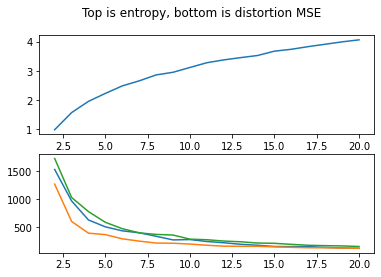

In [15]:
#Q5
import numpy as np
import time

k_list = []

for k in range(2,21) :
    k_list.append(k)

entropy_list = []

time_list = []

distortion_list = []

for k in k_list :
    start = time.time()
    print("calculating entropy for kmeans coding with k = ",k)
    kmeans_k = KMeans(n_clusters=k).fit(png_data_flat)
    entropy_list.append(getEntropy(kmeans_k.labels_))
    end = time.time()
    time_list.append(end-start)
    print(f"calculated entropy in {end-start} ms")

    print("calculating distortion for kmeans coding with k = ", k)
    start = time.time()
    png_data_flat_approx = []

    for label in kmeans_k.labels_:
        png_data_flat_approx.append(kmeans_k.cluster_centers_[label])

    distortion_list.append(MSE_flat(png_data_flat_approx, png_data_flat))
    end = time.time()
    print(f"calculated distortion in {end-start} ms")

fig, axs = plt.subplots(2)
fig.suptitle('Top is entropy, bottom is distortion MSE')
axs[0].plot(k_list, entropy_list)
axs[1].plot(k_list, distortion_list, '-')
plt.show()


In [17]:
#Q6
def getApprox(flat_img,k):

    kmeans = KMeans(n_clusters=k).fit(flat_img)

    flat_img_approx = []

    for label in kmeans.labels_:
        flat_img_approx.append(kmeans.cluster_centers_[label])

    return flat_img_approx, kmeans.cluster_centers_


def flatten(img_data):

    #flattening the array
    img_data_flat = []

    for line in img_data:
        for pixel in line:
            img_data_flat.append(pixel)


def RLE_encoder_kmeans(img_data_approx_flat):
    #flattening the data :
    RLE_data = []
    currentpixel = img_data_approx_flat[0]
    RLE_data.append((1, currentpixel))

    for pixel in img_data_approx_flat:

        if pixel == currentpixel:
            #we increment the last stored tuple
            tmp_tup = RLE_data[-1]
            RLE_data[-1] = (tmp_tup[0]+1, tmp_tup[1])
        else:
            #we add the new sequence beginning to the RLE array
            RLE_data.append((1, pixel))
            currentpixel = pixel

    return RLE_data
    

def codec(img,k):

    img_data = numpy.asarray(img)

    img_data_flat = flatten(img)

    nb_rows = img_data.shape[0]
    nb_lines = img_data.shape[1]

    k = 10

    kmeans_bundle = getApprox(img_data_flat,k)

    img_approx = kmeans_bundle[0]
    approx_codebook = kmeans_bundle[1]

    img_rle = RLE_encoder_kmeans(img_approx)

    res_bundle = {"rows":nb_rows,"columns":nb_lines,"k":k,"codebook":approx_codebook,"RLElength":len(img_rle),"RLE":img_rle}

    return res_bundle



In [ ]:
#Q7

import numpy as np
import time

k_list = []

for k in range(2, 21):
    k_list.append(k)

entropy_list = [[],[]]

distortion_list = [[],[]]

for k in k_list:

    #FILLING WITH ESTIMATED WAY
    start = time.time()
    print("calculating entropy for kmeans coding with k = ", k)
    kmeans_k = KMeans(n_clusters=k).fit(png_data_flat)
    entropy_list[0].append(getEntropy(kmeans_k.labels_))
    end = time.time()
    time_list.append(end-start)
    print(f"calculated entropy in {end-start} ms")

    print("calculating distortion for kmeans coding with k = ", k)
    start = time.time()
    png_data_flat_approx = []

    for label in kmeans_k.labels_:
        png_data_flat_approx.append(kmeans_k.cluster_centers_[label])

    distortion_list[0].append(MSE_flat(png_data_flat_approx, png_data_flat))
    end = time.time()
    print(f"calculated distortion in {end-start} ms")



fig, axs = plt.subplots(2)
fig.suptitle('Top is entropy, bottom is distortion MSE')
axs[0].plot(k_list, entropy_list)
axs[1].plot(k_list, distortion_list, '-')
plt.show()
